In [4]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cell = mp.Vector3(16, 8, 0)
geometry = [mp.Block(mp.Vector3(1e20, 1, 1e20),
                    center=mp.Vector3(0, 0),
                    material=mp.Medium(epsilon=12))]
sources = [mp.Source(mp.ContinuousSource(frequency=0.15),
                    component=mp.Ez,
                    center=mp.Vector3(-7, 0))]
pml_layers = [mp.PML(1.0)]
resolution = 10
sim = mp.Simulation(cell_size=cell,
                   boundary_layers=pml_layers,
                   geometry=geometry,
                   sources=sources,
                   resolution=resolution)

In [3]:
sim.run(until=200)

-----------
Initializing structure...
run 0 finished at t = 200.0 (4000 timesteps)


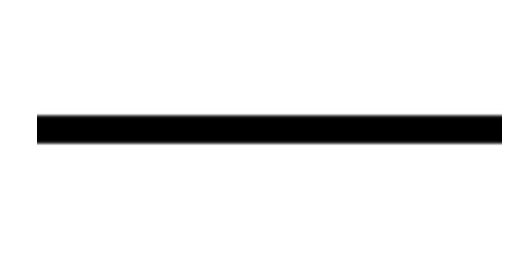

In [5]:
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
plt.figure(dpi=100)
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

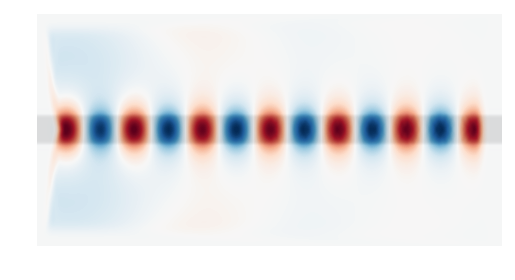

In [6]:
ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
plt.figure(dpi=100)
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
plt.axis('off')
plt.show()

In [7]:
cell = mp.Vector3(16, 16, 0)
geometry = [mp.Block(mp.Vector3(12, 1, 1e20),
                     center=mp.Vector3(-2.5, -3.5),
                     material=mp.Medium(epsilon=12)),
            mp.Block(mp.Vector3(1, 12, 1e20),
                     center=mp.Vector3(3.5, 2),
                     material=mp.Medium(epsilon=12))]
pml_layers = [mp.PML(1.0)]
resolution = 10
sources = [mp.Source(mp.ContinuousSource(wavelength=2*(11**0.5), width=20),
                     component=mp.Ez,
                     center=mp.Vector3(-7,-3.5),
                     size=mp.Vector3(0,1))]
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

In [8]:
sim.run(mp.at_beginning(mp.output_epsilon),
        mp.to_appended("ez", mp.at_every(0.6, mp.output_efield_z)),
        until=200)

-----------
Initializing structure...
Meep progress: 165.4/200.0 = 82.7% done in 4.0s, 0.8s to go
run 0 finished at t = 200.0 (4000 timesteps)
